# Statistics Advanced - 2


1. What is hypothesis testing in statistics?
  - Hypothesis testing is a statistical method used to make decisions about a population based on sample data by testing an assumption (null hypothesis) against an alternative hypothesis, using a test statistic and p-value to decide whether to reject the null.

2. What is the null hypothesis, and how does it differ from the alternative
hypothesis?

  - The null hypothesis (H₀) is the assumption that there is no effect or no difference, while the alternative hypothesis (H₁) is the claim that there is an effect or a difference.

3. Explain the significance level in hypothesis testing and its role in deciding
the outcome of a test.

  - The significance level (α) is the threshold probability used in hypothesis testing to decide whether to reject the null hypothesis.

    It represents the maximum risk of making a Type I error (rejecting H₀ when it is actually true). Common values are 0.05 (5%) or 0.01 (1%).

    Role:

    If p-value ≤ α, reject H₀ (evidence supports H₁).

    If p-value > α, fail to reject H₀ (not enough evidence against H₀).

4. What are Type I and Type II errors? Give examples of each.

  - Type I Error (α): Rejecting the null hypothesis when it is actually true (false positive).

    Example: A medical test shows a person has a disease when they actually do not.

  - Type II Error (β): Failing to reject the null hypothesis when it is actually false (false negative).

    Example: A medical test shows a person does not have a disease when they actually do

5. What is the difference between a Z-test and a T-test? Explain when to use
each.

  -  Z-test: Used when the population standard deviation is known and the sample size is large (n > 30).

  - T-test: Used when the population standard deviation is unknown and the sample size is small (n ≤ 30).

    When to use:

    - Z-test: Large samples, known σ (e.g., testing average height with known population variance).

    - T-test: Small samples, unknown σ (e.g., testing drug effect on 20 patients).


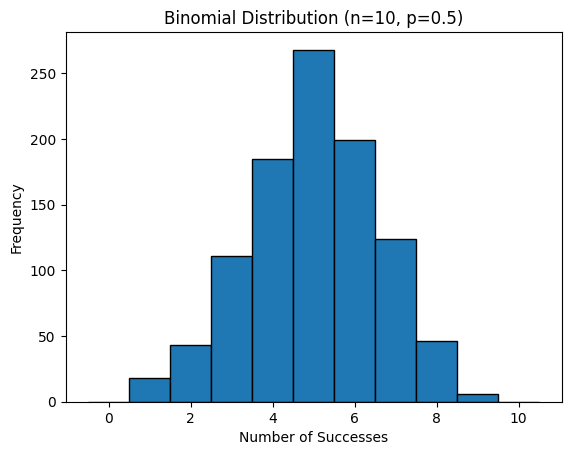

In [1]:
#6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10   # number of trials
p = 0.5  # probability of success
size = 1000  # number of samples

# Generate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=range(n+2), edgecolor='black', align='left')
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()


In [2]:
#7. Implement hypothesis testing using Z-statistics for a sample dataset in
# Python. Show the Python code and interpret the results.
# sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
# 50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
# 50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
# 50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

import numpy as np
from scipy import stats

# Sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Hypothesized population mean (mu0)
mu0 = 50

# Sample statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)
n = len(sample_data)

# Z-test statistic
z_stat = (sample_mean - mu0) / (sample_std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("Sample Mean:", sample_mean)
print("Sample Std Dev:", sample_std)
print("Z-statistic:", z_stat)
print("p-value:", p_value)


Sample Mean: 50.08888888888889
Sample Std Dev: 0.5365379910807955
Z-statistic: 0.9940271559503017
p-value: 0.3202096468890012


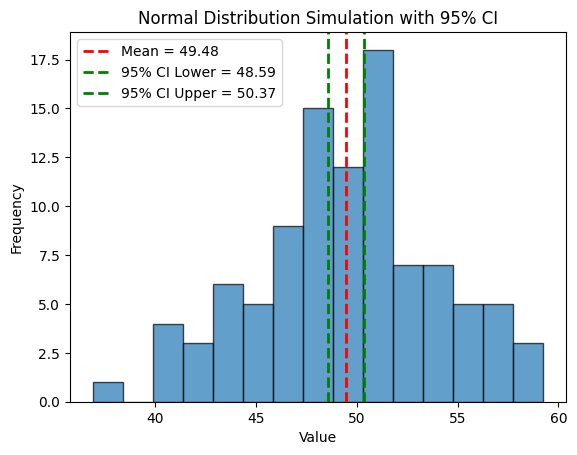

In [3]:
#8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simulate data from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=50, scale=5, size=100)  # mean=50, std=5, n=100

# Sample statistics
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
n = len(data)

# 95% Confidence Interval
conf_level = 0.95
alpha = 1 - conf_level
z_critical = stats.norm.ppf(1 - alpha/2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# Plot histogram of data
plt.hist(data, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {sample_mean:.2f}")
plt.axvline(ci_lower, color='green', linestyle='dashed', linewidth=2, label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='dashed', linewidth=2, label=f"95% CI Upper = {ci_upper:.2f}")

plt.title("Normal Distribution Simulation with 95% CI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


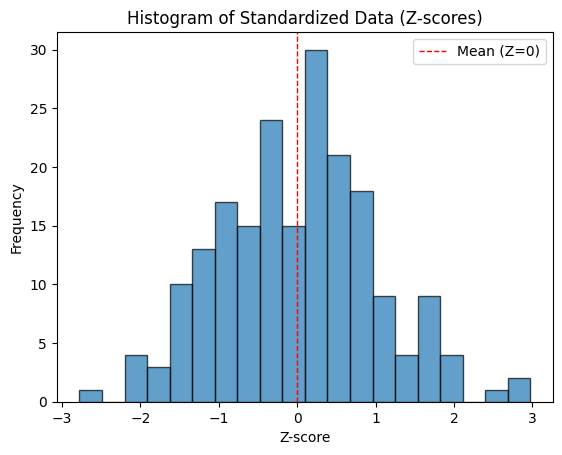

First 10 Z-scores: [ 0.57876651 -0.10498128  0.74133645  1.68390811 -0.20823509 -0.20821741
  1.74440619  0.87027971 -0.46162987  0.62813359]


In [4]:
#9. Write a Python function to calculate the Z-scores from a dataset and
# visualize the standardized data using a histogram. Explain what the Z-scores represent
# in terms of standard deviations from the mean.


import numpy as np
import matplotlib.pyplot as plt

def calculate_z_scores(data):
    """
    Calculate Z-scores for a dataset.

    Parameters:
        data (list or numpy array): Input dataset.

    Returns:
        numpy array: Z-scores of the dataset.
    """
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return z_scores

# Generate some sample data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=200)  # mean=50, std=10

# Calculate Z-scores
z_scores = calculate_z_scores(data)

# Plot histogram of Z-scores
plt.hist(z_scores, bins=20, edgecolor="black", alpha=0.7)
plt.title("Histogram of Standardized Data (Z-scores)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='dashed', linewidth=1, label="Mean (Z=0)")
plt.legend()
plt.show()

# Example output (first 10 Z-scores)
print("First 10 Z-scores:", z_scores[:10])
